In [10]:
import numpy as np
import pandas as pd
# pip install -q -U tensorflow==1.7.0
import tensorflow as tf
print("Tensorflow version:", tf.__version__)
from tensorflow import keras
import matplotlib.pyplot as plt
# from keras.utils import plot_model
# from keras.models import Model
# from keras.layers import Input
# from keras.layers import Dense
# from keras.layers.recurrent import LSTM


Tensorflow version: 1.7.0


In [2]:
seq_length = 3
sample_count = 100
data = [[ i+j for j in range(seq_length)] for i in range(sample_count)]
# print(data)
target = [[ i+j+1 for j in range(seq_length)] for i in range(1,sample_count+1)]
# print(target)

In [3]:
data = np.array(data, dtype=float)
print(data.shape)
target = np.array(target, dtype=float)
print(target.shape)

(100, 3)
(100, 3)


In [4]:
data = data.reshape(sample_count, 1, seq_length)/200
print(data.shape)
target = target.reshape(sample_count, 1, seq_length)/200
print(target.shape)

(100, 1, 3)
(100, 1, 3)


In [13]:
Input_Layer = keras.Input(shape=(1, seq_length))

# 1st LSTM layer with 3 (seq_length) nodes
LSTM_Layer_1 = keras.layers.LSTM(seq_length, return_sequences=True)(Input_Layer)
# 2nd LSTM layer with 3 (seq_length) nodes
LSTM_Layer_2 = keras.layers.LSTM(seq_length, return_sequences=True)(LSTM_Layer_1)
# 3rd LSTM layer with 3 (seq_length) nodes
LSTM_Layer_3 = keras.layers.LSTM(seq_length, return_sequences=True)(LSTM_Layer_2)
# 2nd LSTM layer with 3 (seq_length) nodes
LSTM_Layer_4 = keras.layers.LSTM(seq_length, return_sequences=True)(LSTM_Layer_3)
# 3rd LSTM layer with 3 (seq_length) nodes
LSTM_Layer_5 = keras.layers.LSTM(seq_length, return_sequences=True)(LSTM_Layer_4)


Output_Layer = keras.layers.Dense(seq_length, activation='linear')(LSTM_Layer_5)
model = keras.models.Model(inputs=Input_Layer, outputs=Output_Layer)
print(model.summary())

#keras.utils.plot_model(model, to_file='Simple_LSTM.png')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 1, 3)              0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 3)              84        
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 3)              84        
_________________________________________________________________
lstm_6 (LSTM)                (None, 1, 3)              84        
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 3)              84        
_________________________________________________________________
lstm_8 (LSTM)                (None, 1, 3)              84        
_________________________________________________________________
dense_2 (Dense)              (None, 1, 3)              12        
Total para

In [14]:
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
history = model.fit(data, target, epochs=1000, batch_size=25, validation_data=(data, target))

Train on 100 samples, validate on 100 samples
Epoch 1/1000
100/100 [==============================] - 3s 33ms/step - loss: 0.0888 - acc: 0.0000e+00 - val_loss: 0.0871 - val_acc: 0.0000e+00
Epoch 2/1000
100/100 [==============================] - 0s 320us/step - loss: 0.0861 - acc: 0.0000e+00 - val_loss: 0.0846 - val_acc: 0.0000e+00
Epoch 3/1000
100/100 [==============================] - 0s 360us/step - loss: 0.0836 - acc: 0.0000e+00 - val_loss: 0.0820 - val_acc: 0.0000e+00
Epoch 4/1000
100/100 [==============================] - 0s 330us/step - loss: 0.0810 - acc: 0.0000e+00 - val_loss: 0.0795 - val_acc: 0.0000e+00
Epoch 5/1000
100/100 [==============================] - 0s 420us/step - loss: 0.0785 - acc: 0.0000e+00 - val_loss: 0.0770 - val_acc: 0.0000e+00
Epoch 6/1000
100/100 [==============================] - 0s 380us/step - loss: 0.0760 - acc: 0.0000e+00 - val_loss: 0.0746 - val_acc: 0.0000e+00
Epoch 7/1000
100/100 [==============================] - 0s 370us/step - loss: 0.0737 - acc:

100/100 [==============================] - 0s 350us/step - loss: 0.0209 - acc: 0.0000e+00 - val_loss: 0.0209 - val_acc: 0.0000e+00
Epoch 58/1000
100/100 [==============================] - 0s 320us/step - loss: 0.0208 - acc: 0.0000e+00 - val_loss: 0.0207 - val_acc: 0.0000e+00
Epoch 59/1000
100/100 [==============================] - 0s 320us/step - loss: 0.0207 - acc: 0.0000e+00 - val_loss: 0.0206 - val_acc: 0.0000e+00
Epoch 60/1000
100/100 [==============================] - 0s 300us/step - loss: 0.0206 - acc: 0.0000e+00 - val_loss: 0.0205 - val_acc: 0.0000e+00
Epoch 61/1000
100/100 [==============================] - 0s 320us/step - loss: 0.0205 - acc: 0.0000e+00 - val_loss: 0.0204 - val_acc: 0.0000e+00
Epoch 62/1000
100/100 [==============================] - 0s 400us/step - loss: 0.0204 - acc: 0.0000e+00 - val_loss: 0.0203 - val_acc: 0.0000e+00
Epoch 63/1000
100/100 [==============================] - 0s 370us/step - loss: 0.0203 - acc: 0.0000e+00 - val_loss: 0.0202 - val_acc: 0.0000e+00

100/100 [==============================] - 0s 690us/step - loss: 0.0023 - acc: 0.5700 - val_loss: 0.0023 - val_acc: 0.5800
Epoch 116/1000
100/100 [==============================] - 0s 400us/step - loss: 0.0022 - acc: 0.5800 - val_loss: 0.0022 - val_acc: 0.5800
Epoch 117/1000
100/100 [==============================] - 0s 390us/step - loss: 0.0021 - acc: 0.5800 - val_loss: 0.0021 - val_acc: 0.5800
Epoch 118/1000
100/100 [==============================] - 0s 380us/step - loss: 0.0021 - acc: 0.5800 - val_loss: 0.0020 - val_acc: 0.5800
Epoch 119/1000
100/100 [==============================] - 0s 390us/step - loss: 0.0020 - acc: 0.5800 - val_loss: 0.0020 - val_acc: 0.5800
Epoch 120/1000
100/100 [==============================] - 0s 360us/step - loss: 0.0020 - acc: 0.5700 - val_loss: 0.0019 - val_acc: 0.5700
Epoch 121/1000
100/100 [==============================] - 0s 380us/step - loss: 0.0019 - acc: 0.5700 - val_loss: 0.0019 - val_acc: 0.5700
Epoch 122/1000
100/100 [=========================

100/100 [==============================] - 0s 500us/step - loss: 7.4243e-04 - acc: 0.6100 - val_loss: 7.3533e-04 - val_acc: 0.6100
Epoch 174/1000
100/100 [==============================] - 0s 430us/step - loss: 7.3209e-04 - acc: 0.6100 - val_loss: 7.2500e-04 - val_acc: 0.6200
Epoch 175/1000
100/100 [==============================] - 0s 400us/step - loss: 7.2274e-04 - acc: 0.6200 - val_loss: 7.1482e-04 - val_acc: 0.6200
Epoch 176/1000
100/100 [==============================] - 0s 480us/step - loss: 7.1124e-04 - acc: 0.6200 - val_loss: 7.0537e-04 - val_acc: 0.6200
Epoch 177/1000
100/100 [==============================] - 0s 370us/step - loss: 7.0307e-04 - acc: 0.6200 - val_loss: 6.9602e-04 - val_acc: 0.6200
Epoch 178/1000
100/100 [==============================] - 0s 380us/step - loss: 6.9359e-04 - acc: 0.6200 - val_loss: 6.8651e-04 - val_acc: 0.6200
Epoch 179/1000
100/100 [==============================] - 0s 530us/step - loss: 6.8398e-04 - acc: 0.6200 - val_loss: 6.7727e-04 - val_acc: 

Epoch 229/1000
100/100 [==============================] - 0s 360us/step - loss: 4.0469e-04 - acc: 0.6700 - val_loss: 4.0208e-04 - val_acc: 0.6700
Epoch 230/1000
100/100 [==============================] - 0s 360us/step - loss: 4.0104e-04 - acc: 0.6700 - val_loss: 3.9842e-04 - val_acc: 0.6700
Epoch 231/1000
100/100 [==============================] - 0s 340us/step - loss: 3.9892e-04 - acc: 0.6700 - val_loss: 3.9537e-04 - val_acc: 0.6800
Epoch 232/1000
100/100 [==============================] - 0s 370us/step - loss: 3.9471e-04 - acc: 0.6800 - val_loss: 3.9201e-04 - val_acc: 0.6800
Epoch 233/1000
100/100 [==============================] - 0s 350us/step - loss: 3.9096e-04 - acc: 0.6800 - val_loss: 3.8889e-04 - val_acc: 0.6800
Epoch 234/1000
100/100 [==============================] - 0s 360us/step - loss: 3.8811e-04 - acc: 0.6800 - val_loss: 3.8581e-04 - val_acc: 0.6900
Epoch 235/1000
100/100 [==============================] - 0s 400us/step - loss: 3.8615e-04 - acc: 0.6900 - val_loss: 3.8306e

100/100 [==============================] - 0s 340us/step - loss: 2.7609e-04 - acc: 1.0000 - val_loss: 2.7415e-04 - val_acc: 1.0000
Epoch 286/1000
100/100 [==============================] - 0s 360us/step - loss: 2.7343e-04 - acc: 1.0000 - val_loss: 2.7260e-04 - val_acc: 1.0000
Epoch 287/1000
100/100 [==============================] - 0s 340us/step - loss: 2.7240e-04 - acc: 1.0000 - val_loss: 2.7129e-04 - val_acc: 1.0000
Epoch 288/1000
100/100 [==============================] - 0s 370us/step - loss: 2.7110e-04 - acc: 1.0000 - val_loss: 2.6966e-04 - val_acc: 1.0000
Epoch 289/1000
100/100 [==============================] - 0s 360us/step - loss: 2.6928e-04 - acc: 1.0000 - val_loss: 2.6767e-04 - val_acc: 1.0000
Epoch 290/1000
100/100 [==============================] - 0s 330us/step - loss: 2.6733e-04 - acc: 1.0000 - val_loss: 2.6624e-04 - val_acc: 1.0000
Epoch 291/1000
100/100 [==============================] - 0s 340us/step - loss: 2.7031e-04 - acc: 1.0000 - val_loss: 2.6535e-04 - val_acc: 

100/100 [==============================] - 0s 310us/step - loss: 1.9925e-04 - acc: 1.0000 - val_loss: 1.9787e-04 - val_acc: 1.0000
Epoch 342/1000
100/100 [==============================] - 0s 320us/step - loss: 1.9853e-04 - acc: 1.0000 - val_loss: 1.9724e-04 - val_acc: 1.0000
Epoch 343/1000
100/100 [==============================] - 0s 320us/step - loss: 1.9715e-04 - acc: 1.0000 - val_loss: 1.9553e-04 - val_acc: 1.0000
Epoch 344/1000
100/100 [==============================] - 0s 350us/step - loss: 1.9539e-04 - acc: 1.0000 - val_loss: 1.9442e-04 - val_acc: 1.0000
Epoch 345/1000
100/100 [==============================] - 0s 330us/step - loss: 1.9495e-04 - acc: 1.0000 - val_loss: 1.9346e-04 - val_acc: 1.0000
Epoch 346/1000
100/100 [==============================] - 0s 340us/step - loss: 1.9318e-04 - acc: 1.0000 - val_loss: 1.9220e-04 - val_acc: 1.0000
Epoch 347/1000
100/100 [==============================] - 0s 340us/step - loss: 1.9264e-04 - acc: 1.0000 - val_loss: 1.9124e-04 - val_acc: 

100/100 [==============================] - 0s 350us/step - loss: 1.4407e-04 - acc: 1.0000 - val_loss: 1.4219e-04 - val_acc: 1.0000
Epoch 398/1000
100/100 [==============================] - 0s 360us/step - loss: 1.4270e-04 - acc: 1.0000 - val_loss: 1.4122e-04 - val_acc: 1.0000
Epoch 399/1000
100/100 [==============================] - 0s 320us/step - loss: 1.4151e-04 - acc: 1.0000 - val_loss: 1.4047e-04 - val_acc: 1.0000
Epoch 400/1000
100/100 [==============================] - 0s 400us/step - loss: 1.4113e-04 - acc: 1.0000 - val_loss: 1.3955e-04 - val_acc: 1.0000
Epoch 401/1000
100/100 [==============================] - 0s 350us/step - loss: 1.3974e-04 - acc: 1.0000 - val_loss: 1.3893e-04 - val_acc: 1.0000
Epoch 402/1000
100/100 [==============================] - 0s 310us/step - loss: 1.3981e-04 - acc: 1.0000 - val_loss: 1.3791e-04 - val_acc: 1.0000
Epoch 403/1000
100/100 [==============================] - 0s 420us/step - loss: 1.3753e-04 - acc: 1.0000 - val_loss: 1.3703e-04 - val_acc: 

100/100 [==============================] - 0s 410us/step - loss: 1.0136e-04 - acc: 1.0000 - val_loss: 1.0073e-04 - val_acc: 1.0000
Epoch 454/1000
100/100 [==============================] - 0s 350us/step - loss: 1.0079e-04 - acc: 1.0000 - val_loss: 9.9213e-05 - val_acc: 1.0000
Epoch 455/1000
100/100 [==============================] - 0s 370us/step - loss: 9.9280e-05 - acc: 1.0000 - val_loss: 9.8885e-05 - val_acc: 1.0000
Epoch 456/1000
100/100 [==============================] - 0s 370us/step - loss: 9.8829e-05 - acc: 1.0000 - val_loss: 9.7919e-05 - val_acc: 1.0000
Epoch 457/1000
100/100 [==============================] - 0s 380us/step - loss: 9.7989e-05 - acc: 1.0000 - val_loss: 9.7463e-05 - val_acc: 1.0000
Epoch 458/1000
100/100 [==============================] - 0s 410us/step - loss: 9.7381e-05 - acc: 1.0000 - val_loss: 9.6701e-05 - val_acc: 1.0000
Epoch 459/1000
100/100 [==============================] - 0s 380us/step - loss: 9.6645e-05 - acc: 1.0000 - val_loss: 9.6013e-05 - val_acc: 

100/100 [==============================] - 0s 340us/step - loss: 6.9342e-05 - acc: 1.0000 - val_loss: 6.7717e-05 - val_acc: 1.0000
Epoch 510/1000
100/100 [==============================] - 0s 330us/step - loss: 6.7189e-05 - acc: 1.0000 - val_loss: 6.7799e-05 - val_acc: 1.0000
Epoch 511/1000
100/100 [==============================] - 0s 410us/step - loss: 6.8300e-05 - acc: 1.0000 - val_loss: 6.7134e-05 - val_acc: 1.0000
Epoch 512/1000
100/100 [==============================] - 0s 400us/step - loss: 6.6385e-05 - acc: 1.0000 - val_loss: 6.6528e-05 - val_acc: 1.0000
Epoch 513/1000
100/100 [==============================] - 0s 360us/step - loss: 6.6846e-05 - acc: 1.0000 - val_loss: 6.5876e-05 - val_acc: 1.0000
Epoch 514/1000
100/100 [==============================] - 0s 360us/step - loss: 6.5867e-05 - acc: 1.0000 - val_loss: 6.5158e-05 - val_acc: 1.0000
Epoch 515/1000
100/100 [==============================] - 0s 330us/step - loss: 6.5320e-05 - acc: 1.0000 - val_loss: 6.4741e-05 - val_acc: 

Epoch 565/1000
100/100 [==============================] - 0s 370us/step - loss: 4.4274e-05 - acc: 1.0000 - val_loss: 4.3498e-05 - val_acc: 1.0000
Epoch 566/1000
100/100 [==============================] - 0s 370us/step - loss: 4.3420e-05 - acc: 1.0000 - val_loss: 4.2888e-05 - val_acc: 1.0000
Epoch 567/1000
100/100 [==============================] - 0s 370us/step - loss: 4.2846e-05 - acc: 1.0000 - val_loss: 4.2600e-05 - val_acc: 1.0000
Epoch 568/1000
100/100 [==============================] - 0s 350us/step - loss: 4.2539e-05 - acc: 1.0000 - val_loss: 4.2120e-05 - val_acc: 1.0000
Epoch 569/1000
100/100 [==============================] - 0s 320us/step - loss: 4.2263e-05 - acc: 1.0000 - val_loss: 4.1766e-05 - val_acc: 1.0000
Epoch 570/1000
100/100 [==============================] - 0s 340us/step - loss: 4.1692e-05 - acc: 1.0000 - val_loss: 4.1507e-05 - val_acc: 1.0000
Epoch 571/1000
100/100 [==============================] - 0s 320us/step - loss: 4.1768e-05 - acc: 1.0000 - val_loss: 4.1093e

Epoch 621/1000
100/100 [==============================] - 0s 320us/step - loss: 2.6002e-05 - acc: 1.0000 - val_loss: 2.5637e-05 - val_acc: 1.0000
Epoch 622/1000
100/100 [==============================] - 0s 390us/step - loss: 2.5889e-05 - acc: 1.0000 - val_loss: 2.5337e-05 - val_acc: 1.0000
Epoch 623/1000
100/100 [==============================] - 0s 370us/step - loss: 2.5282e-05 - acc: 1.0000 - val_loss: 2.5063e-05 - val_acc: 1.0000
Epoch 624/1000
100/100 [==============================] - 0s 361us/step - loss: 2.5110e-05 - acc: 1.0000 - val_loss: 2.4805e-05 - val_acc: 1.0000
Epoch 625/1000
100/100 [==============================] - 0s 370us/step - loss: 2.4817e-05 - acc: 1.0000 - val_loss: 2.4569e-05 - val_acc: 1.0000
Epoch 626/1000
100/100 [==============================] - 0s 340us/step - loss: 2.4538e-05 - acc: 1.0000 - val_loss: 2.4310e-05 - val_acc: 1.0000
Epoch 627/1000
100/100 [==============================] - 0s 310us/step - loss: 2.4363e-05 - acc: 1.0000 - val_loss: 2.4061e

100/100 [==============================] - 0s 350us/step - loss: 1.4567e-05 - acc: 1.0000 - val_loss: 1.4051e-05 - val_acc: 1.0000
Epoch 678/1000
100/100 [==============================] - 0s 320us/step - loss: 1.3842e-05 - acc: 1.0000 - val_loss: 1.4177e-05 - val_acc: 1.0000
Epoch 679/1000
100/100 [==============================] - 0s 350us/step - loss: 1.4052e-05 - acc: 1.0000 - val_loss: 1.3606e-05 - val_acc: 1.0000
Epoch 680/1000
100/100 [==============================] - 0s 320us/step - loss: 1.3567e-05 - acc: 1.0000 - val_loss: 1.3469e-05 - val_acc: 1.0000
Epoch 681/1000
100/100 [==============================] - 0s 330us/step - loss: 1.3467e-05 - acc: 1.0000 - val_loss: 1.3299e-05 - val_acc: 1.0000
Epoch 682/1000
100/100 [==============================] - 0s 320us/step - loss: 1.3278e-05 - acc: 1.0000 - val_loss: 1.3142e-05 - val_acc: 1.0000
Epoch 683/1000
100/100 [==============================] - 0s 350us/step - loss: 1.3128e-05 - acc: 1.0000 - val_loss: 1.2995e-05 - val_acc: 

100/100 [==============================] - 0s 360us/step - loss: 7.3860e-06 - acc: 1.0000 - val_loss: 7.1656e-06 - val_acc: 1.0000
Epoch 734/1000
100/100 [==============================] - 0s 330us/step - loss: 7.1861e-06 - acc: 1.0000 - val_loss: 7.1666e-06 - val_acc: 1.0000
Epoch 735/1000
100/100 [==============================] - 0s 500us/step - loss: 7.0976e-06 - acc: 1.0000 - val_loss: 7.0350e-06 - val_acc: 1.0000
Epoch 736/1000
100/100 [==============================] - 0s 500us/step - loss: 7.0199e-06 - acc: 1.0000 - val_loss: 6.9146e-06 - val_acc: 1.0000
Epoch 737/1000
100/100 [==============================] - 0s 380us/step - loss: 6.9577e-06 - acc: 1.0000 - val_loss: 6.8686e-06 - val_acc: 1.0000
Epoch 738/1000
100/100 [==============================] - 0s 340us/step - loss: 6.8239e-06 - acc: 1.0000 - val_loss: 6.7735e-06 - val_acc: 1.0000
Epoch 739/1000
100/100 [==============================] - 0s 350us/step - loss: 6.8107e-06 - acc: 1.0000 - val_loss: 6.6732e-06 - val_acc: 

100/100 [==============================] - 0s 390us/step - loss: 3.8910e-06 - acc: 1.0000 - val_loss: 3.8088e-06 - val_acc: 1.0000
Epoch 790/1000
100/100 [==============================] - 0s 320us/step - loss: 3.8751e-06 - acc: 1.0000 - val_loss: 3.7724e-06 - val_acc: 1.0000
Epoch 791/1000
100/100 [==============================] - 0s 350us/step - loss: 3.8395e-06 - acc: 1.0000 - val_loss: 3.7671e-06 - val_acc: 1.0000
Epoch 792/1000
100/100 [==============================] - 0s 350us/step - loss: 3.8109e-06 - acc: 1.0000 - val_loss: 3.7744e-06 - val_acc: 1.0000
Epoch 793/1000
100/100 [==============================] - 0s 320us/step - loss: 3.6807e-06 - acc: 1.0000 - val_loss: 3.7015e-06 - val_acc: 1.0000
Epoch 794/1000
100/100 [==============================] - 0s 340us/step - loss: 3.7063e-06 - acc: 1.0000 - val_loss: 3.6166e-06 - val_acc: 1.0000
Epoch 795/1000
100/100 [==============================] - 0s 330us/step - loss: 3.6917e-06 - acc: 1.0000 - val_loss: 3.6310e-06 - val_acc: 

100/100 [==============================] - 0s 410us/step - loss: 2.4100e-06 - acc: 1.0000 - val_loss: 2.3768e-06 - val_acc: 1.0000
Epoch 846/1000
100/100 [==============================] - 0s 430us/step - loss: 2.3870e-06 - acc: 1.0000 - val_loss: 2.3562e-06 - val_acc: 1.0000
Epoch 847/1000
100/100 [==============================] - 0s 490us/step - loss: 2.3692e-06 - acc: 1.0000 - val_loss: 2.3414e-06 - val_acc: 1.0000
Epoch 848/1000
100/100 [==============================] - 0s 480us/step - loss: 2.3505e-06 - acc: 1.0000 - val_loss: 2.3295e-06 - val_acc: 1.0000
Epoch 849/1000
100/100 [==============================] - 0s 480us/step - loss: 2.3674e-06 - acc: 1.0000 - val_loss: 2.3159e-06 - val_acc: 1.0000
Epoch 850/1000
100/100 [==============================] - 0s 530us/step - loss: 2.3543e-06 - acc: 1.0000 - val_loss: 2.3057e-06 - val_acc: 1.0000
Epoch 851/1000
100/100 [==============================] - 0s 410us/step - loss: 2.3001e-06 - acc: 1.0000 - val_loss: 2.3347e-06 - val_acc: 

100/100 [==============================] - 0s 380us/step - loss: 1.8994e-06 - acc: 1.0000 - val_loss: 1.8339e-06 - val_acc: 1.0000
Epoch 902/1000
100/100 [==============================] - 0s 420us/step - loss: 1.8494e-06 - acc: 1.0000 - val_loss: 1.8340e-06 - val_acc: 1.0000
Epoch 903/1000
100/100 [==============================] - 0s 390us/step - loss: 1.8204e-06 - acc: 1.0000 - val_loss: 1.8404e-06 - val_acc: 1.0000
Epoch 904/1000
100/100 [==============================] - 0s 370us/step - loss: 1.8648e-06 - acc: 1.0000 - val_loss: 1.8243e-06 - val_acc: 1.0000
Epoch 905/1000
100/100 [==============================] - 0s 420us/step - loss: 1.8243e-06 - acc: 1.0000 - val_loss: 1.8118e-06 - val_acc: 1.0000
Epoch 906/1000
100/100 [==============================] - 0s 370us/step - loss: 1.8483e-06 - acc: 1.0000 - val_loss: 1.8020e-06 - val_acc: 1.0000
Epoch 907/1000
100/100 [==============================] - 0s 370us/step - loss: 1.8012e-06 - acc: 1.0000 - val_loss: 1.8068e-06 - val_acc: 

100/100 [==============================] - 0s 390us/step - loss: 1.6543e-06 - acc: 1.0000 - val_loss: 1.6149e-06 - val_acc: 1.0000
Epoch 958/1000
100/100 [==============================] - 0s 500us/step - loss: 1.7087e-06 - acc: 1.0000 - val_loss: 1.6163e-06 - val_acc: 1.0000
Epoch 959/1000
100/100 [==============================] - 0s 480us/step - loss: 1.6986e-06 - acc: 1.0000 - val_loss: 1.6070e-06 - val_acc: 1.0000
Epoch 960/1000
100/100 [==============================] - 0s 430us/step - loss: 1.6839e-06 - acc: 1.0000 - val_loss: 1.6089e-06 - val_acc: 1.0000
Epoch 961/1000
100/100 [==============================] - 0s 420us/step - loss: 1.6608e-06 - acc: 1.0000 - val_loss: 1.6034e-06 - val_acc: 1.0000
Epoch 962/1000
100/100 [==============================] - 0s 490us/step - loss: 1.6918e-06 - acc: 1.0000 - val_loss: 1.5984e-06 - val_acc: 1.0000
Epoch 963/1000
100/100 [==============================] - 0s 580us/step - loss: 1.7208e-06 - acc: 1.0000 - val_loss: 1.6043e-06 - val_acc: 

In [15]:
prediction_normalized = model.predict(data)
prediction = prediction_normalized * 200
print(prediction)

[[[  3.2545686   3.6646328   4.7895536]]

 [[  4.0092454   4.45463     5.5781546]]

 [[  4.787487    5.269129    6.3912063]]

 [[  5.588685    6.1074176   7.227982 ]]

 [[  6.4121284   6.968666    8.087641 ]]

 [[  7.2569685   7.8518934   8.9691925]]

 [[  8.122265    8.756023    9.871546 ]]

 [[  9.006969    9.679847   10.79348  ]]

 [[  9.909951   10.62208    11.733695 ]]

 [[ 10.830001   11.581345   12.690802 ]]

 [[ 11.765856   12.556211   13.663356 ]]

 [[ 12.7162     13.545193   14.649857 ]]

 [[ 13.679697   14.546782   15.648784 ]]

 [[ 14.654996   15.559462   16.658604 ]]

 [[ 15.640746   16.581717   17.677801 ]]

 [[ 16.635641   17.612087   18.704893 ]]

 [[ 17.638376   18.649118   19.738424 ]]

 [[ 18.6477     19.691425   20.776997 ]]

 [[ 19.662441   20.73771    21.819305 ]]

 [[ 20.68148    21.786737   22.864115 ]]

 [[ 21.703783   22.837376   23.910284 ]]

 [[ 22.728376   23.888552   24.956745 ]]

 [[ 23.75441    24.939352   26.002575 ]]

 [[ 24.781109   25.988937   27.046

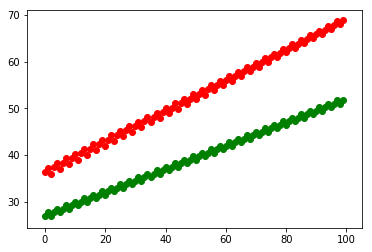

In [20]:
plt.scatter(range(100), prediction.reshape(300)[100:200], c='r')
plt.scatter(range(100), (target*150).reshape(300)[100:200], c='g')
plt.show()


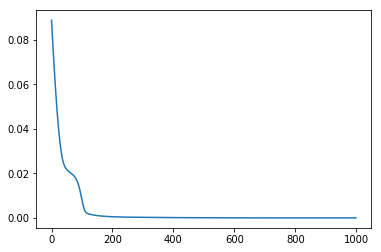

In [17]:
plt.plot(history.history['loss'])
plt.show()
